In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 데이터 준비
* sklearn에서 제공하는 샘플 데이터 활용

In [25]:
from sklearn.datasets import load_iris 
iris = load_iris() 
# print('data:', iris.data)
# print('data:', iris.feature_names)
# print('data:', iris.target)
# print('data:', iris.target_names)

df_iris = pd.DataFrame(iris.data,
             columns = iris.feature_names)
df_iris["species"] = iris.target
df_iris.head(3)


# df_iris["species"] = df_iris["species"].map(dict(zip([0,1,2], iris.target_names)))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0



#### 데이터 탐색

In [26]:
# -----------------------------------
# 종속변수 빈도수 확인
#   불균형 여부 확인
# -----------------------------------

df_iris['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

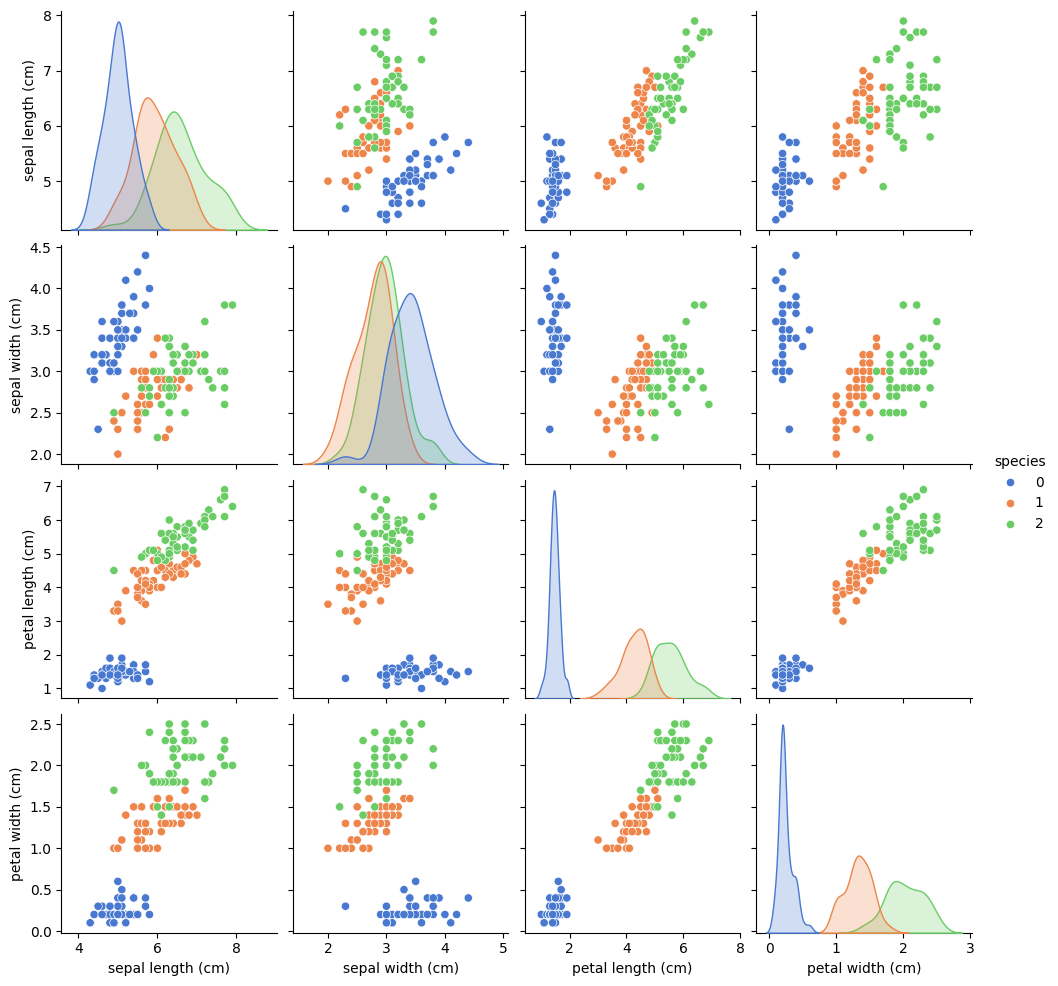

In [27]:
# -----------------------------------
# 시각화
# -----------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(data=df_iris, hue="species", palette='muted')
plt.show()

#### 데이터 선택

In [ ]:
# ----------------
# X, y
# ----------------
X = df_iris.drop('species', axis=1)
y = df_iris['species']

#### 학습용 데이터와 테스트용 데이터 분할

In [29]:
# ----------------
# 균등분할
#   stratify
# ----------------

from sklearn.model_selection import train_test_split

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size=0.2
                                                    , random_state=42
                                                    , stratify=y)

# 데이터의 크기 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

(120, 4) (30, 4) (120,) (30,)
species
0    40
2    40
1    40
Name: count, dtype: int64
species
0    10
2    10
1    10
Name: count, dtype: int64


#### 모델 생성 및 학습

In [30]:
# ---------------------------------------
# DecisionTreeClassifier 모델 생성
# ---------------------------------------
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)

# ---------------------------------------
# 모델 학습
# ---------------------------------------
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### 교차검증

In [31]:
# ---------------------------------------
# StratifiedKFold 객체 생성
# ---------------------------------------
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [32]:
# ---------------------------------------
# 교차검증 수행
# ---------------------------------------
model = DecisionTreeClassifier()
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model,
                X = X_train,
                y = y_train,
                scoring='accuracy',
                cv=skf)

print(f'cv_scores : {np.around(cv_scores,4)}')
print(f'cv_scores_mean : {cv_scores.mean():.4f}')

cv_scores : [0.9583 0.9583 0.9583 0.9583 0.9167]
cv_scores_mean : 0.9500


In [34]:
# ----------------------------------------------
# 훈련데이터 전체로 훈련
# ----------------------------------------------
model.fit(X_train, y_train)

# ---------------------------------------
# 분류 모델의 평가지표 리포트
#   support : 해당 클래스의 표본 수
#   macro avg : 클래스 별 지표의 단순 평균
#   weighted avg : 클래스별 지표 * support 후 총 support로 나눈 값
#                  데이터 불균형이 크면 weighted 수치가 macro보다 실제 성능을 더 잘 나타냄
# ---------------------------------------
from sklearn.metrics import classification_report
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



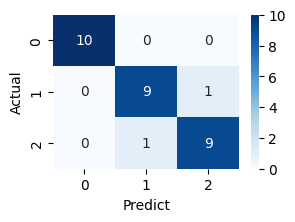

In [35]:
# --------------------------------
# 혼동행렬 (행=실제, 열=예측)
# --------------------------------
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred, labels=[0,1,2])

plt.figure(figsize=(3,2))
sns.heatmap(cm, cmap='Blues', annot=True)
plt.xlabel('Predict')
plt.ylabel('Actual')
pass


#### 의사결정트리 모델의 학습 결과

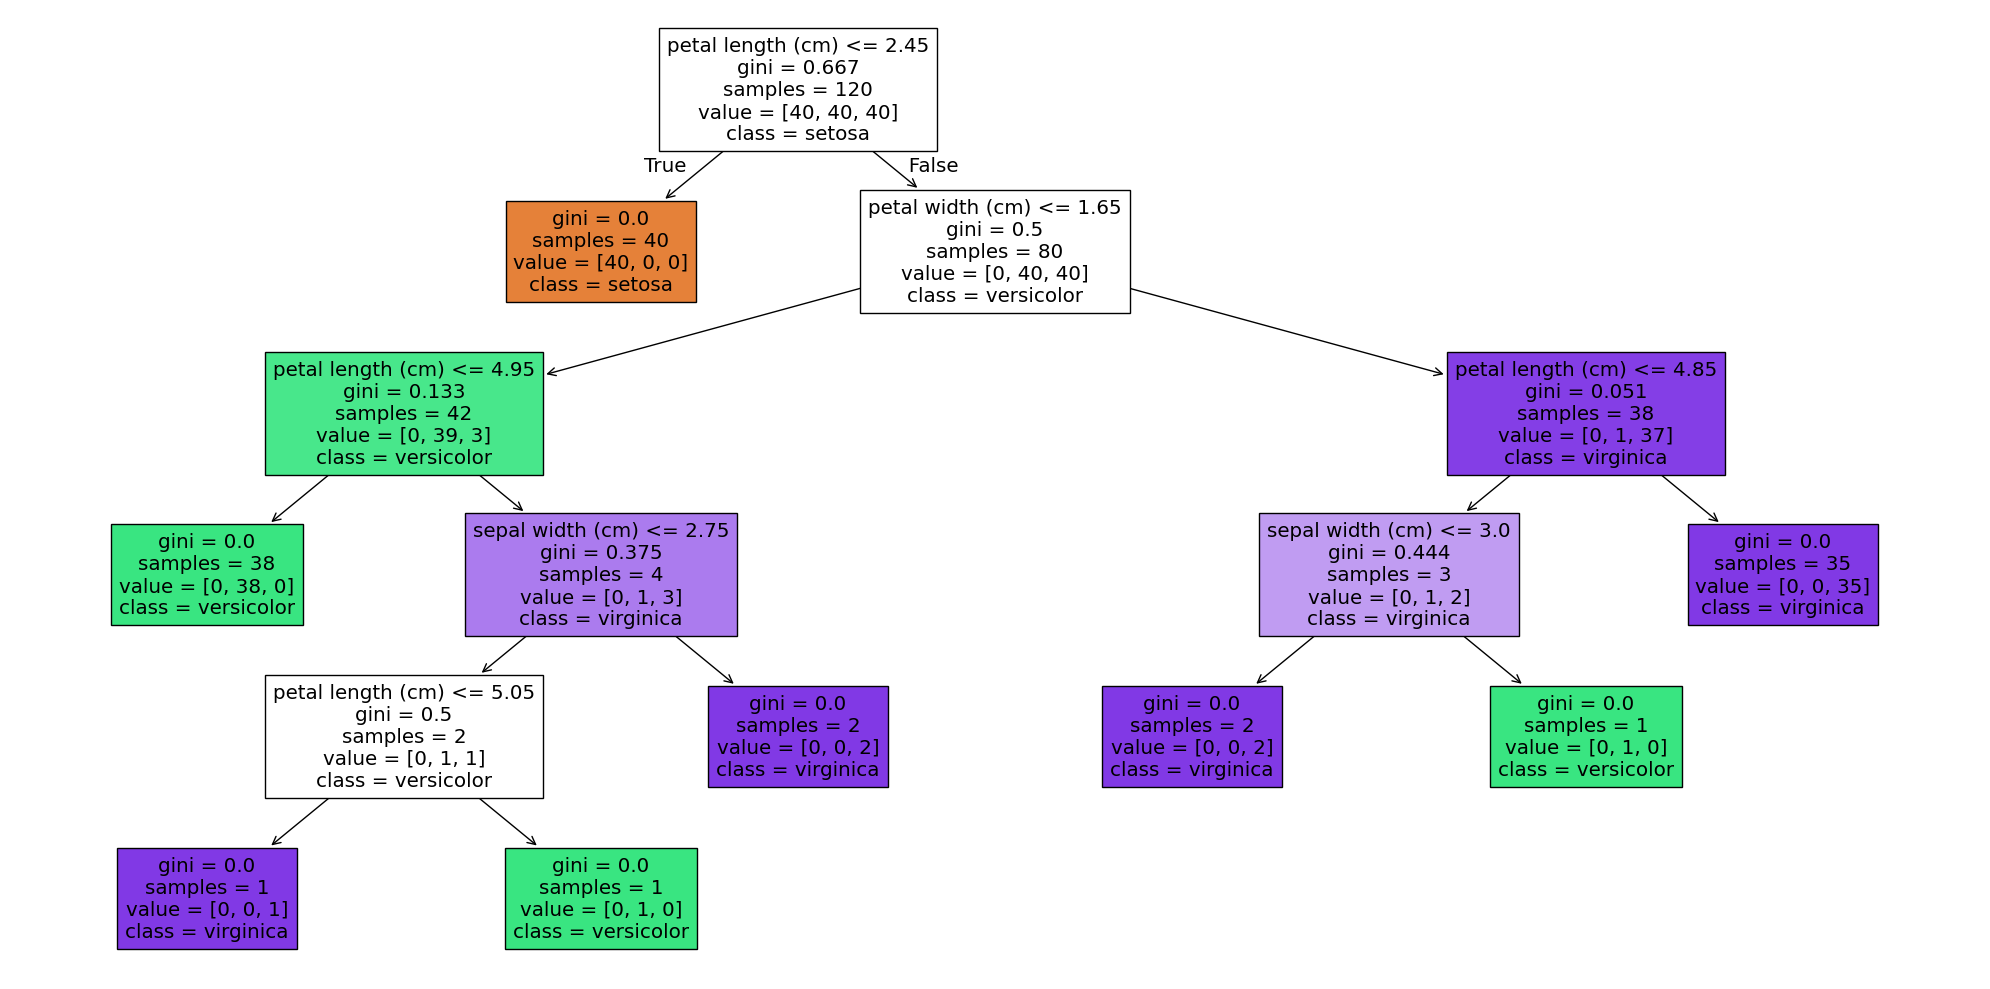

In [36]:
# 트리 시각화
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(model,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True
          )
plt.tight_layout()
plt.show()

In [37]:
# --------------------------
# 트리의 깊이
#   get_depth()
# --------------------------
print(model.get_depth())

5


특성의 중요도 >>> [0.         0.02291667 0.5710683  0.40601504]


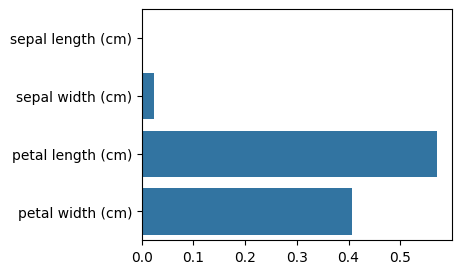

In [38]:
# --------------------------
# feature_importances_
# --------------------------
print(f'특성의 중요도 >>> {model.feature_importances_}')

plt.figure(figsize=(4,3))
sns.barplot(y=iris.feature_names, x=model.feature_importances_);
